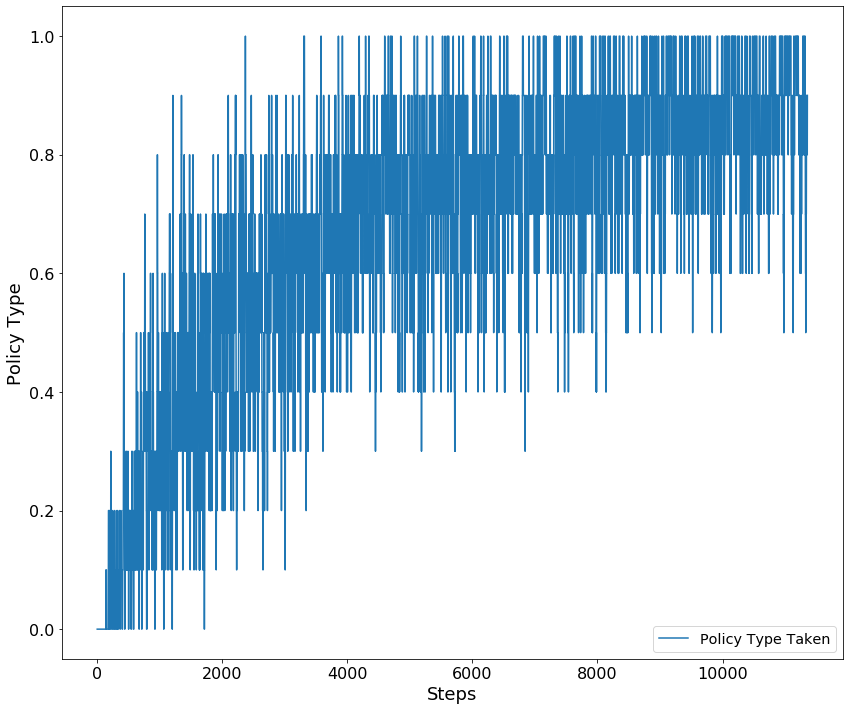

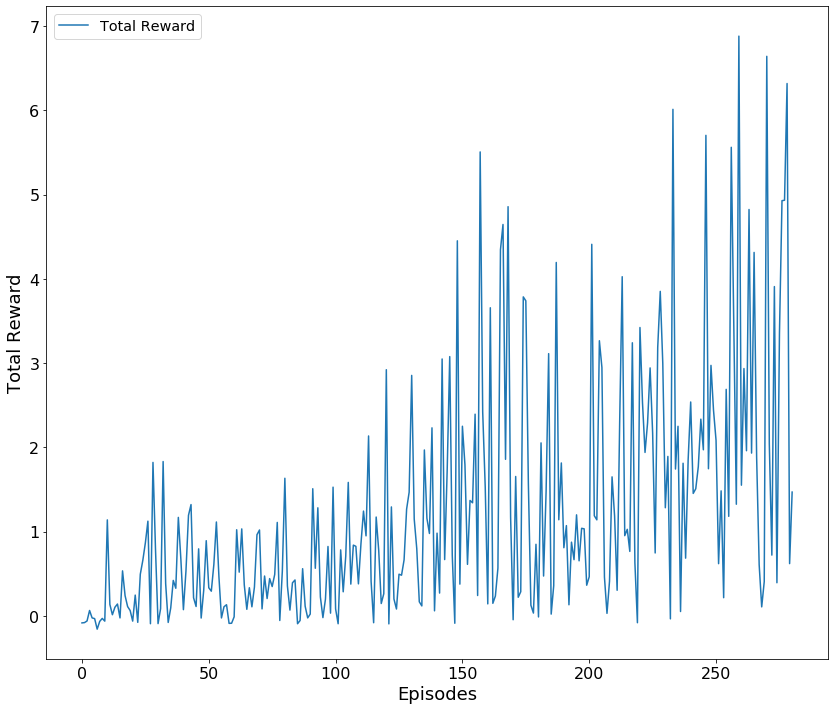

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## READ data 
import pandas as pd
import numpy as np
import math, sys
dir_name = '../'
filename1 = dir_name+'data_accelerator_lstm_episode10000_steps50_batched_memories_0602420_v1.log'
frame = pd.read_csv(filename1, sep=' ',
                 header=None, names=['current_state', 'action', 'reward','next_state', 'total_reward','done','policy_type','episode'])

## rolling averages ##
rolling_setting = 10
frame['policy_type_roll'] = frame['policy_type'].rolling(rolling_setting).mean()
frame['total_reward_roll'] = frame['total_reward'].rolling(rolling_setting).mean()


## Plot all action types ##
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['policy_type_roll'].interpolate(method='cubic'),label='Policy Type Taken')
ax.set_xlabel('Steps')
ax.set_ylabel('Policy Type')
#plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.show()

## Print total reward ##
frame_done = frame[frame.done==True] 
frame_done = frame_done.reset_index()
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame_done['total_reward_roll'], label='Total Reward')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total Reward')
plt.legend(fontsize='x-large')
plt.show()